# 데이터 가져오기

In [3]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('C:\\Users\\mk\\Desktop\\python\\train.csv')

# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])

train_year = train['datetime'].dt.year 
train_month = train['datetime'].dt.month 
train_day = train['datetime'].dt.day 
train_hour = train['datetime'].dt.hour 
train_minute = train['datetime'].dt.minute 
train_second = train['datetime'].dt.second 

train['train_year'] = train_year
train['train_month'] = train_month
train['train_day'] = train_day
train['train_hour'] = train_hour
train['train_minute'] = train_minute
train['train_second'] = train_second

# year, month, day, hour, minute, second 데이터 개수 시각화하기

<function matplotlib.pyplot.show(close=None, block=None)>

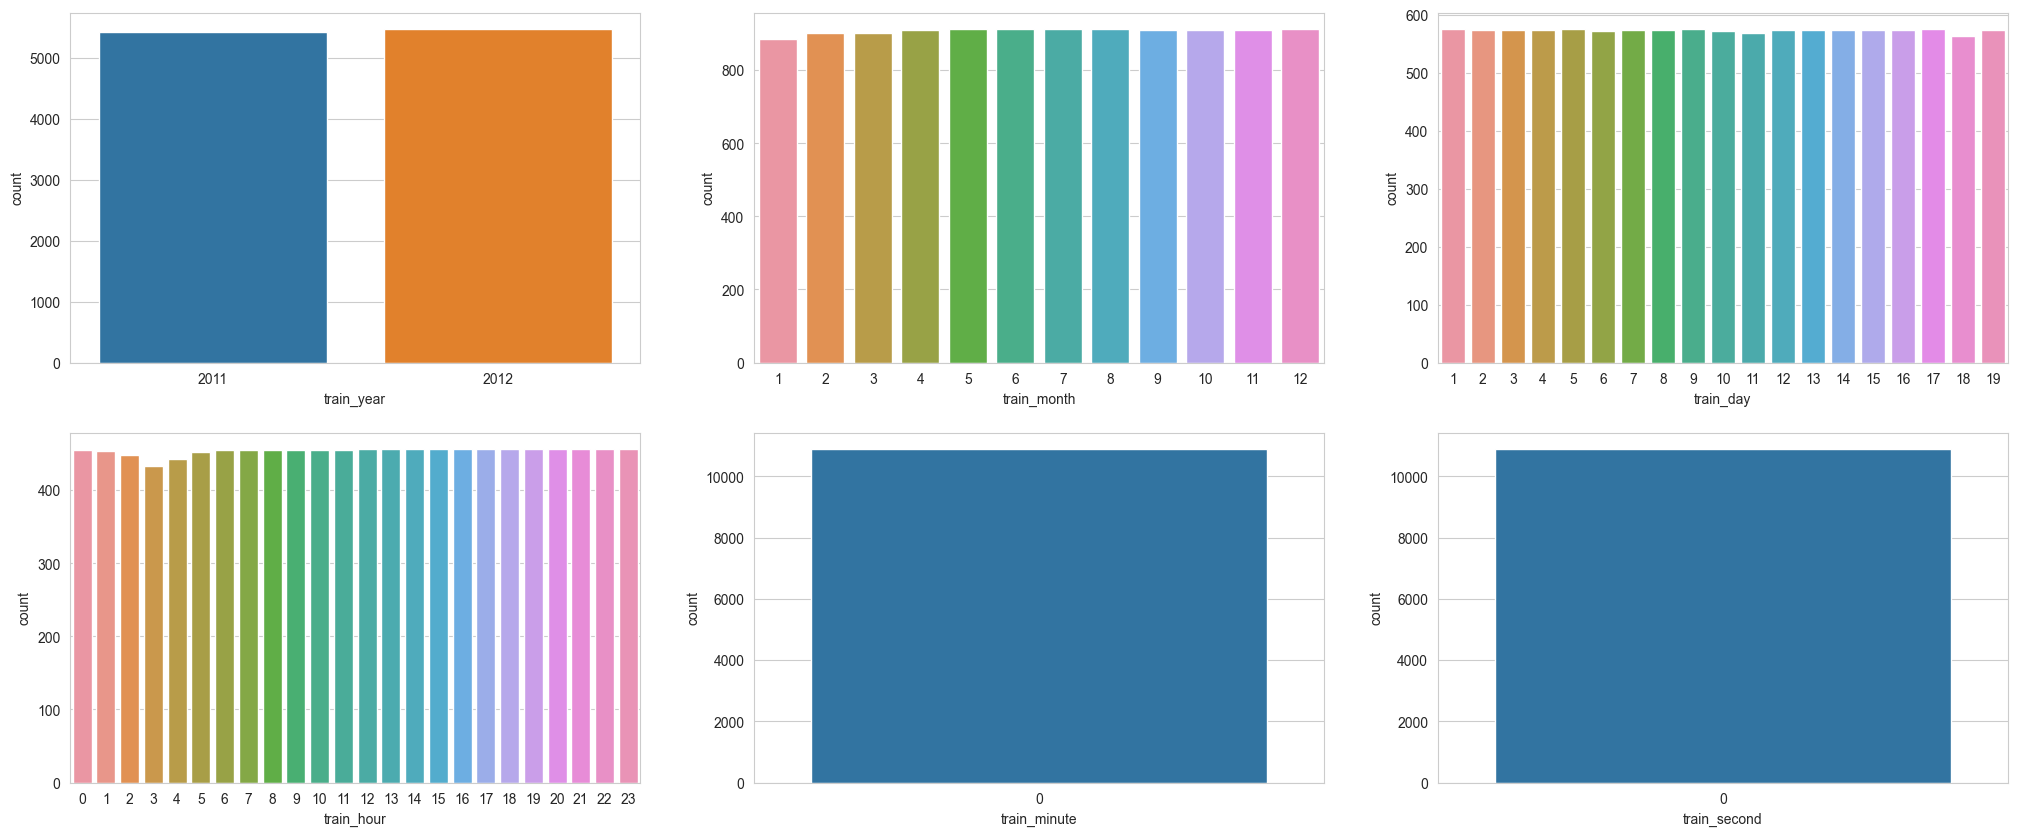

In [30]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.countplot(x='train_year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='train_month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='train_day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='train_hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='train_minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='train_second', data=train)

plt.show


# X, y 컬럼 선택 및 train/test 데이터 분리

In [31]:
X= train[['train_year','train_month','train_day','train_hour','train_minute','train_second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']].values
y= train[['count']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

#  LinearRegression 모델 학습

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)

[[248.10627003]
 [ 48.79765547]
 [200.90676727]
 ...
 [309.7528022 ]
 [ 38.17030198]
 [243.62697388]]


# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

In [34]:
rmse

141.22807813517096

#  x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

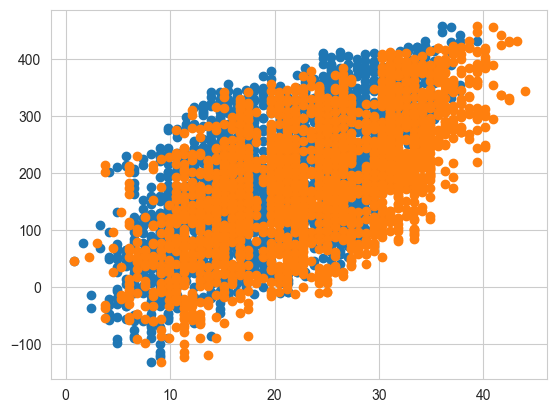

In [36]:

#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.scatter(X_test[:,10], predictions)
plt.scatter(X_test[:,11], predictions)

plt.show()